In [47]:
import numpy as np
from varname import nameof

# adapted from stack overflow
def bmatrix(a, var_name, exercise=1):
    """Stores in a file a LaTeX bmatrix from a numpy array."""
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join([f"{float(x):.6g}" for x in l.split()]) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    with open(f"./aux-matrices/ex-{exercise}/{var_name}.tex", 'w+') as f:
      f.write('\n'.join(rv))

# 1)

In [48]:
SAMPLES = np.array([
  [-2, 2],
  [-1, 3],
  [0, 1],
  [-2, 1],
])

mu = np.mean(SAMPLES, axis=0)
bmatrix(mu.reshape(-1, 1), nameof(mu))

Sigma = np.cov(SAMPLES, rowvar=False)
bmatrix(Sigma, nameof(Sigma))

Sigma_inv = np.linalg.inv(Sigma)
bmatrix(Sigma_inv, nameof(Sigma_inv))

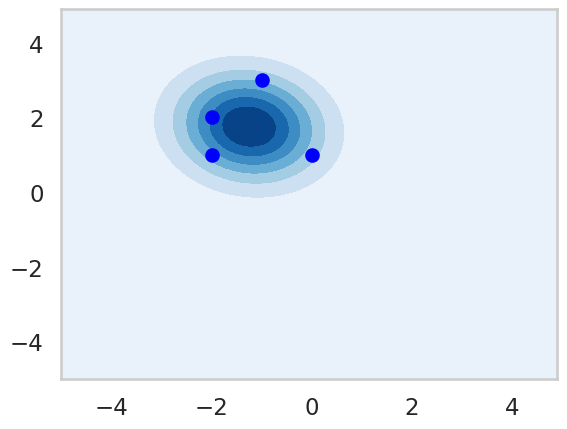

In [49]:
# draw the contour plot of the multivariate normal distribution
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# this is copilot's work, i don't know how it works
x, y = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mu, Sigma)
plt.contourf(x, y, rv.pdf(pos), cmap='Blues')
plt.scatter(SAMPLES[:, 0], SAMPLES[:, 1], color='blue')
# make it an SVG
plt.savefig('./assets/ex-1/contour.svg', format='svg')
plt.show()

# 3)

In [50]:
SAMPLES = np.array([
  [170, 160],
  [80, 220],
  [90, 200],
  [60, 160],
  [50, 150],
  [70, 190],
])

LABELS = np.array([0, 1, 1, 0, 0, 1])

mu_0 = np.mean(SAMPLES[LABELS == 0], axis=0)
bmatrix(mu_0.reshape(-1, 1), nameof(mu_0), exercise=3)

mu_1 = np.mean(SAMPLES[LABELS == 1], axis=0)
bmatrix(mu_1.reshape(-1, 1), nameof(mu_1), exercise=3)

Sigma_0 = np.cov(SAMPLES[LABELS == 0], rowvar=False)
bmatrix(Sigma_0, nameof(Sigma_0), exercise=3)

Sigma_1 = np.cov(SAMPLES[LABELS == 1], rowvar=False)
bmatrix(Sigma_1, nameof(Sigma_1), exercise=3)

print(f"mu_0 = {mu_0}")
print(f"mu_1 = {mu_1}")
print(f"Sigma_0 = {Sigma_0}")
print(f"Sigma_1 = {Sigma_1}")

mu_0 = [ 93.33333333 156.66666667]
mu_1 = [ 80.         203.33333333]
Sigma_0 = [[4433.33333333  216.66666667]
 [ 216.66666667   33.33333333]]
Sigma_1 = [[100.          50.        ]
 [ 50.         233.33333333]]


In [55]:
QUERY_POINT = np.array([100, 225])

# calculate the likelihoods
p_0 = multivariate_normal(mu_0, Sigma_0).pdf(QUERY_POINT)
p_1 = multivariate_normal(mu_1, Sigma_1).pdf(QUERY_POINT)

print(f"likelihood: z=0: {p_0:.6g}")
print(f"likelihood: z=1: {p_1:.6g}")

likelihood: z=0: 3.47826e-48
likelihood: z=1: 0.000107642


In [57]:
sigma_0 = np.sqrt(np.diag(Sigma_0))
sigma_1 = np.sqrt(np.diag(Sigma_1))

bmatrix(sigma_0.reshape(-1, 1), nameof(sigma_0), exercise=3)
bmatrix(sigma_1.reshape(-1, 1), nameof(sigma_1), exercise=3)

print(f"sigma_0 = {sigma_0}")
print(f"sigma_1 = {sigma_1}")

sigma_0 = [66.58328118  5.77350269]
sigma_1 = [10.         15.27525232]


In [60]:
# calculate the likelihoods

from scipy.stats import norm

p_0 = norm(mu_0[0], sigma_0[0]).pdf(QUERY_POINT[0]) * norm(mu_0[1], sigma_0[1]).pdf(QUERY_POINT[1])
p_1 = norm(mu_1[0], sigma_1[0]).pdf(QUERY_POINT[0]) * norm(mu_1[1], sigma_1[1]).pdf(QUERY_POINT[1])

print(f"likelihood: z=0: {p_0:.6g}")
print(f"likelihood: z=1: {p_1:.6g}")

likelihood: z=0: 1.57083e-34
likelihood: z=1: 5.1566e-05
